# matplotlib API入门

信息可视化（也叫绘图）是数据分析中最重要的工作之一。

它可能是探索过程的一部分，例如，帮助我们找出异常值、必要的数据转换、得出有关模型的想法等。

matplotlib 是一个用于创建出版质量图表的桌面绘图包（主要是 2D 方面）。

随着时间的发展，matplotlib 衍生出了多个数据可视化的工具集，它们使用 matplotlib 作为底层。其中之一是 seaborn。

In [18]:
%matplotlib inline

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
data = np.arange(10)

In [21]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

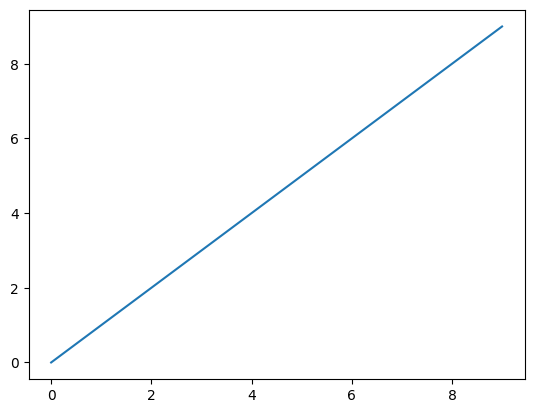

In [22]:
plt.plot(data)

seaborn 这样的库和 pandas 的内置绘图函数能够处理许多普通的绘图任务(基于matplotlib)，但如果需要自定义一些高级功能的话就必须学习 matplotlib API。

## 图形和子图

matplotlib 的图像都位于图形对象中。

使用 plt.figure() 创建一个新的图形。

不能通过空图形绘图。必须用add_subplot创建一个或多个子图才行。

**提示：使用 Jupyter 笔记本有一点不同，即每个小窗重新执行后，图形会被重置。因此，对于复杂的图形，，你必须将所有的绘图命令存在一个小窗里。**

如果这时执行一条绘图命令（如plt.plot([1.5, 3.5, -2, 1.6])），matplotlib 就会在最后一个用过的子图（如果没有则创建一个）上进行绘制，隐藏创建图形和子图的过程。

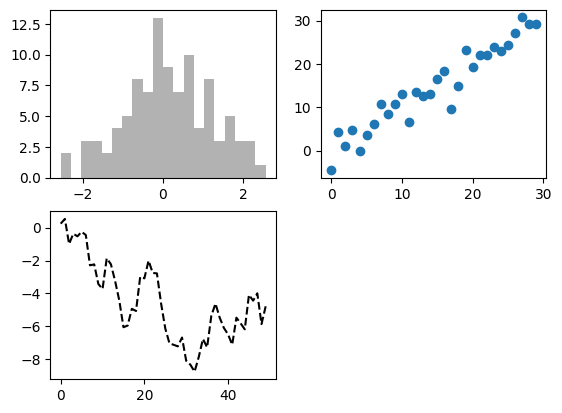

In [26]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)

ax2 = fig.add_subplot(2, 2, 2)

ax3 = fig.add_subplot(2, 2, 3)

plt.plot(np.random.randn(50).cumsum(), 'k--')

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

创建包含子图网格的图形是一个非常常见的任务，matplotlib 有一个更为方便的方法plt.subplots，它可以创建一个新的图形，并返回一个含有已创建的子图对象的 NumPy 数组。

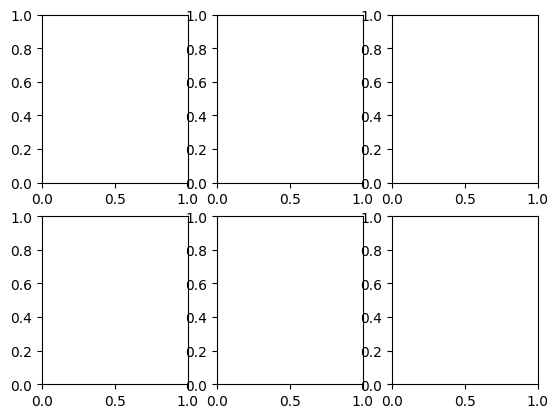

In [27]:
fig, axes = plt.subplots(2, 3)

In [28]:
axes

array([[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

## 调整子图周围的间距

默认情况下，matplotlib 会在子图外围留下一定的边距，并在子图之间留下一定的间距。

利用图形的subplots_adjust方法可以轻而易举地修改间距。

wspace和hspace用于控制宽度和高度的百分比，可以用作子图之间的间距。

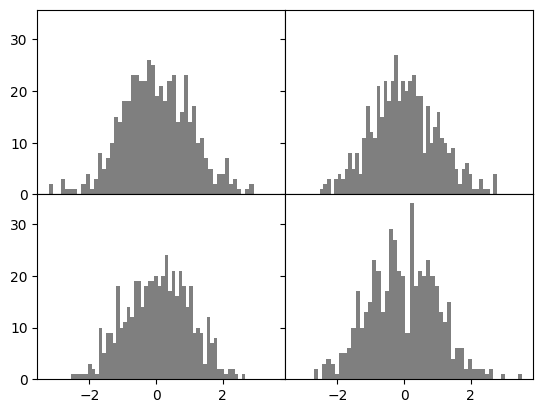

In [29]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

# 使用 pandas 和 seaborn 绘图

matplotlib 实际上是一种比较低级的工具。要绘制一张图表，你组装一些基本组件就行：数据展示（即图表类型：线型图、柱状图、盒形图、散点图、等值线图等）、图例、标题、刻度标签以及其他注解型信息。

在 pandas 中，我们有多列数据，还有行和列标签。pandas 自身就有内置的方法，用于简化从DataFrame和Series绘制图形。另一个库 seaborn，由 Michael Waskom 创建的静态图形库。Seaborn 简化了许多常见可视类型的创建。

## 线性图

Series和DataFrame都有一个用于生成各类图表的plot方法。默认情况下，它们所生成的是线型图。

<AxesSubplot: >

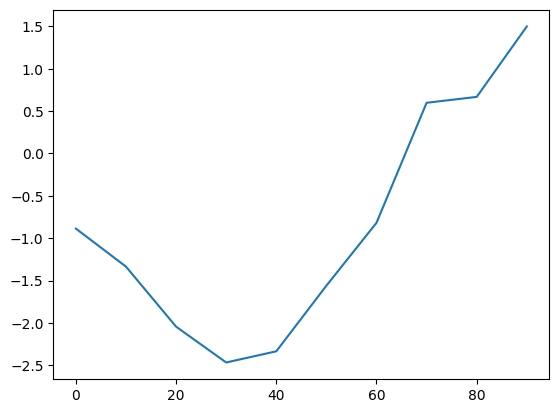

In [30]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

s.plot()

该Series对象的索引会被传给 matplotlib，并用以绘制 X 轴。

In [31]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))

<AxesSubplot: >

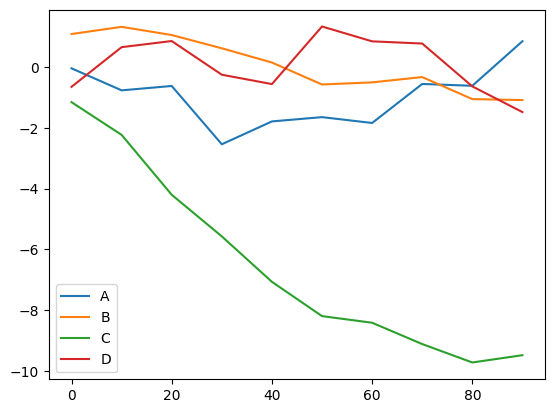

In [32]:
df.plot()

DataFrame还有一些用于对列进行灵活处理的选项，例如，是要将所有列都绘制到一个子图中还是创建各自的子图。

## 柱状图

plot.bar()和plot.barh()分别绘制水平和垂直的柱状图。

<AxesSubplot: >

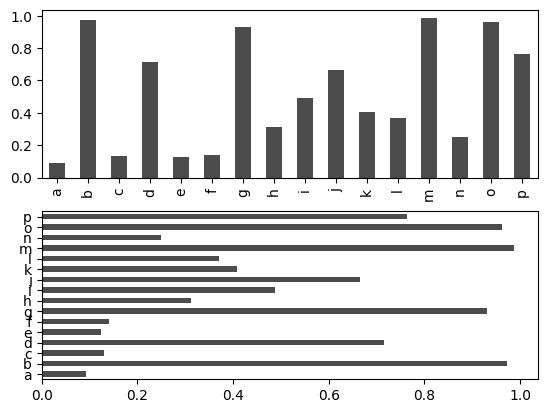

In [33]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)

data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [37]:
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'], columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [38]:
df

Genus,A,B,C,D
one,0.570592,0.305676,0.169994,0.272371
two,0.650870,0.894095,0.434900,0.506964
three,0.332564,0.053381,0.720241,0.352304
four,0.392505,0.261943,0.167920,0.618971
five,0.315418,0.246325,0.863310,0.335315
six,0.386902,0.345579,0.467577,0.238733


<AxesSubplot: >

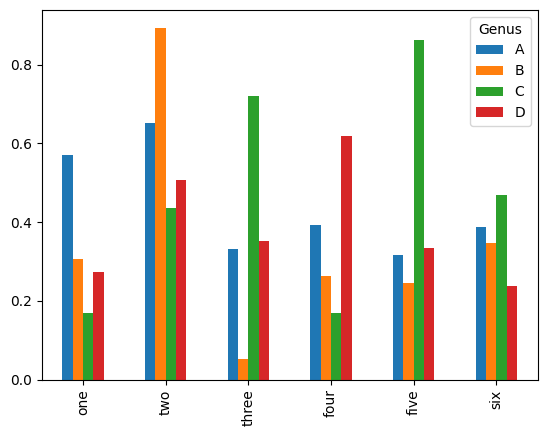

In [39]:
df.plot.bar()

<AxesSubplot: >

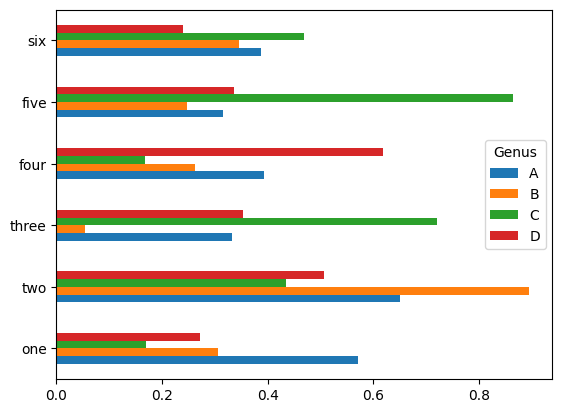

In [40]:
df.plot.barh()

<AxesSubplot: >

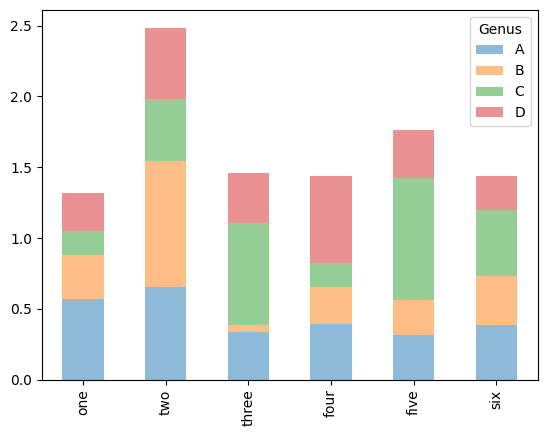

In [42]:
df.plot.bar(stacked=True, alpha=0.5)